In [ ]:
211111 

###  Task 2: Clustering
From the given "iris" dataset, predict the optimum number of clusters and represent it visually.


### Clustering
1. Unsupervised ML
2. interpret the input data and find natural groups or clusters in feature space.


#### Popular categories of clustering algorithms:
- Partitional clustering. Divides data objects into nonoverlapping groups.
- Density-based clustering. Determines cluster assignments based on the density of data points in a region. Clusters are assigned where there are high densities of data points separated by low-density regions.
- Hierarchical clustering

#### K-Means Clustering
1. Specify the number of $k$ of clusters to assign.
2. Randomly initialise $k$ centroids.

repeat
>expectation: assign each point to its closest centroid.
>maximisation: compute the new centroid(mean) of each cluster

until the centroid positions do not change

Result:
1. The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
2. Each point is closer to its own cluster center than to other cluster centers.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
import warnings

warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
os.chdir('/content/drive/My Drive/Notebooks/')

In [5]:
df = pd.read_csv("../Data/iris_data.csv")

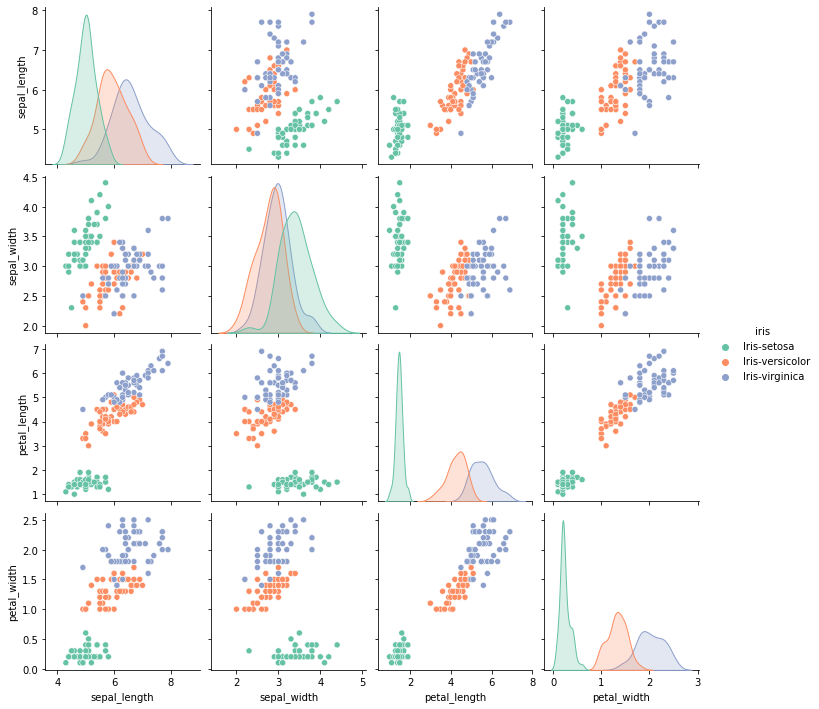

In [6]:
sns.pairplot(data=df,hue="iris",palette="Set2")
plt.show()

iris-setosa is easily separable from the other two.  
However, in unsupervised learning, the data is not labelled, which means only the input variables (x) are given with no corresponding output variables. The algorithms discover interesting structures in the data on their own.

In [7]:
features = df.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
features.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
86,6.7,3.1,4.7,1.5
83,6.0,2.7,5.1,1.6
115,6.4,3.2,5.3,2.3
145,6.7,3.0,5.2,2.3


#### Clustering  
#### Implement the K Means Clustering
In clustering, the data is divided into several groups with similar traits. 
Some clustering algorithms - K-Means, Hierarchical, t-SNE, and DBSCAN  
Try K-Means. 

Finding the best amount of clusters to get most accurate results (KMeans)

Elbow method helps to select the optimal number of clusters by fitting the model with a range of values for K in K-means algorithm. Elbow method draws a line plot between SSE (Sum of Squared errors - also termed "inertia") vs number of clusters.
Affter the “elbow point” the SSE or inertia starts decreasing in a linear fashion. ELBOW RULE - look for the point where the line changes almost 90 degrees.

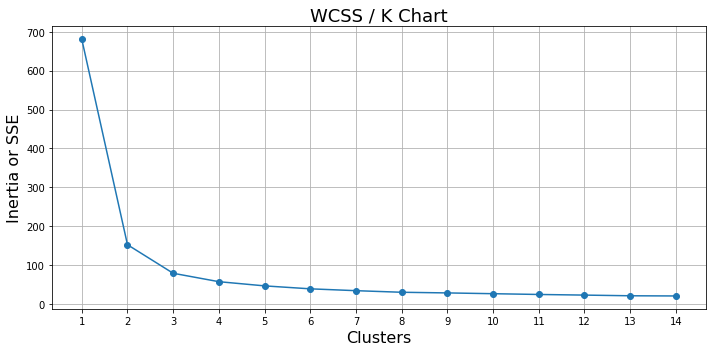

In [8]:
wcss = [] # Within Cluster Sum of Squares

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Clusters",fontsize=16)
plt.ylabel("Inertia or SSE",fontsize=16)
plt.xticks(range(1,15))
plt.tight_layout()
plt.show()

3 or 2 seems to be our Best value(s) for clusters. (By the Elbow Rule)
Let's Double ChecK.

In [9]:
print(f'before clustering:\n{features.head()}\n')
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
print(f'after clustering:\n{features.head()}\n')
print(f'Labels: {features.labels.unique()}\n')

before clustering:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

after clustering:
   sepal_length  sepal_width  petal_length  petal_width  labels
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

Labels: [0 1 2]



#### Scatter Plots with value of $k$ from 1 to 4  

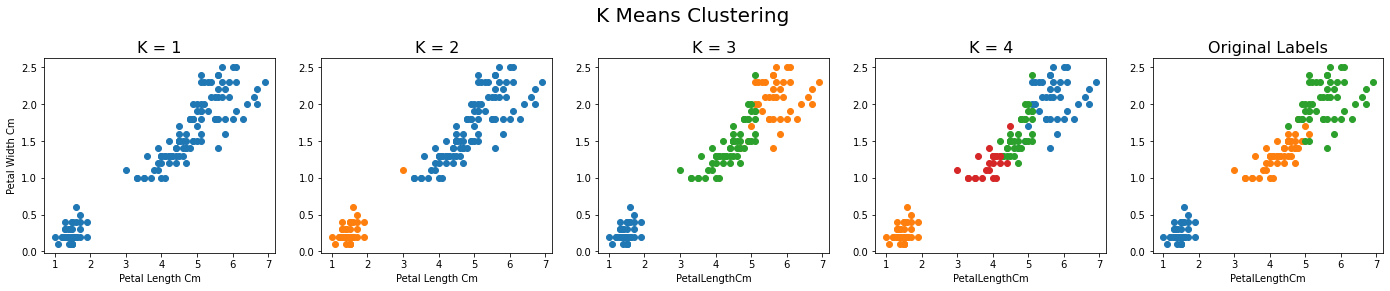

In [10]:
# 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("Petal Length Cm")
plt.ylabel("Petal Width Cm")
plt.scatter(features.petal_length,features.petal_width)

# make two clusters
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)

plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("Petal Length Cm")
plt.scatter(features.petal_length[features.labels == 0],features.petal_width[features.labels == 0])
plt.scatter(features.petal_length[features.labels == 1],features.petal_width[features.labels == 1])

# make three clusters
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)

plt.subplot(1,5,3)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(features.petal_length[features.labels == 0],features.petal_width[features.labels == 0])
plt.scatter(features.petal_length[features.labels == 1],features.petal_width[features.labels == 1])
plt.scatter(features.petal_length[features.labels == 2],features.petal_width[features.labels == 2])

# make four clusters
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)

plt.subplot(1,5,4)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(features.petal_length[features.labels == 0],features.petal_width[features.labels == 0])
plt.scatter(features.petal_length[features.labels == 1],features.petal_width[features.labels == 1])
plt.scatter(features.petal_length[features.labels == 2],features.petal_width[features.labels == 2])
plt.scatter(features.petal_length[features.labels == 3],features.petal_width[features.labels == 3])

# With Original Labels
plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.petal_length[df.iris == "Iris-setosa"],df.petal_width[df.iris == "Iris-setosa"])
plt.scatter(df.petal_length[df.iris == "Iris-versicolor"],df.petal_width[df.iris == "Iris-versicolor"])
plt.scatter(df.petal_length[df.iris == "Iris-virginica"],df.petal_width[df.iris == "Iris-virginica"])

plt.subplots_adjust(top=0.8)

With 3 clusters, the prediction is closest to the original clusters.

#### Check Clustering Loss Function  
Setosa are grouped together
Clusters 0 and 2 have mixed up Virginica and Versicolor

In [11]:
kmeans = KMeans(n_clusters=3)
df["labels"] = kmeans.fit_predict(features)

gb_lbl = df.groupby('labels')
print('label  Setosa  Versicolor  Virginica')
for lbl, group, in gb_lbl:
    print(f"  {lbl}{len(group[group.iris=='Iris-setosa']):8}{len(group[group.iris=='Iris-versicolor']):10}{len(group[group.iris=='Iris-virginica']):10} ")

label  Setosa  Versicolor  Virginica
  0       0         3        36 
  1      50         0         0 
  2       0        47        14 
